<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/norwegian_grammar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Norwegian verbs practice

## Uploading packages and data

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import json
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
#Removing previous versions of the uploaded file
!rm norske_verb.xlsx

In [2]:
#Uploading file from local drive
from google.colab import files
uploaded1 = files.upload()

Saving norske_verb.xlsx to norske_verb.xlsx


In [3]:
#Storing dataset in a Pandas Dataframe
import io
df1 = pd.read_excel(io.BytesIO(uploaded1['norske_verb.xlsx']))

In [4]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gruppe      379 non-null    object
 1   infinitiv   379 non-null    object
 2   presens     379 non-null    object
 3   preteritum  378 non-null    object
 4   perfektum   378 non-null    object
 5   imperativ   60 non-null     object
 6   english     379 non-null    object
dtypes: object(7)
memory usage: 20.9+ KB


##Generating JSON data

In [ ]:
#Printing the number of key values available
list(df1['gruppe'].unique())

In [ ]:
#Filtering between one of the test options
#df1_slice = df1[df1['gruppe']=='S']
#df1_slice.shape

(75, 7)

In [5]:
#Transforming dataframe to string (JSON format)
df1_str = df1.to_json(orient='records')

In [6]:
#Dumping string to JSON file
df1_json = json.loads(df1_str)

In [7]:
#Selecting one arbitrary value from the JSON file
df1_json[-1]['english']

'Practise'

In [ ]:
#Checking the JSON schema
df1_json[0]

{'english': 'Obey',
 'gruppe': 'A',
 'imperativ': None,
 'infinitiv': 'å adlyde',
 'perfektum': 'har adlydt',
 'presens': 'adlyder',
 'preteritum': 'adlød'}

In [8]:
#Creating functions to simulate a practice test

def sample_numbers(num1, num2, max_num=1):
  return random.sample(range(num1, num2), max_num)

def pick_word(i):
  print(f'\nVerb nummer: {i}')
  print('*'*30)
  for k, v in df1_json[i].items():
    print(f'{k}: {v}')
    print('-'*30)


if __name__ == '__main__':
  #Initializing variables
  test_result = []
  counter = 0
  sample_size = 15 #==> change this value

  #Generating unique sample numbers that don't repeat
  sample_indexes = [i for i in sample_numbers(0, len(df1_json), sample_size)] #==> data is shuffled
  
  for i in range(len(sample_indexes)):
    print(f'\nNum: {i+1}')
    pick_word(sample_indexes[i])
    answer = input('\nKjenner du dette verbet? (y/n)').strip().lower()
    test_result.append((sample_indexes[i], df1_json[sample_indexes[i]]['presens'], answer))
    clear_output()

  print(test_result[-2:])

[(227, 'renser', 'y'), (305, 'stemmer', 'y')]


##Practice Results

In [9]:
#Displaying the results

score = 0
wrong_answers = []

for i in range(len(test_result)):
  if test_result[i][2] == 'y':
    score += 1
  else:
    wrong_answers.append(test_result[i][0])

final_score = (score/len(sample_indexes))*100

if final_score < 100:
  print(f'Your score: {final_score}/100')
  print('\nYou should review the following words:\n')
  for i in range(len(wrong_answers)):
    print(f'Verb: {wrong_answers[i]}:', df1_json[wrong_answers[i]]['presens'], '==> ', df1_json[wrong_answers[i]]['english'])
    #print(f"The correct answer is: {df1_json[wrong_answers[i]]['re']}")
    #print(df4_json[wrong_answers[i]][df1_json[wrong_answers[i]]['re']])
    #print('*'*50, '\n')
else:
  print(f'Your score: {final_score}/100')
  print('\nThanks for being awesome!!!')

Your score: 53.333333333333336/100

You should review the following words:

Verb: 182: lyger ==>  Tell a lie
Verb: 298: sprekker ==>  Crack, Burst
Verb: 41: byr ==>  Offer, Bid
Verb: 304: steller ==>  Care, Take care of
Verb: 55: dytter ==>  Push
Verb: 269: skynder ==>  Hurry, Hasten
Verb: 367: vinker ==>  Wave


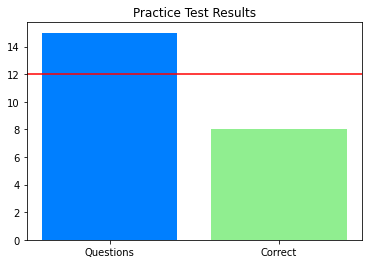

In [10]:
#Visualizing the results

plt.bar([1, 2], [len(test_result), score], tick_label=['Questions', 'Correct'], color=['#007FFF', '#90EE90'])
plt.axhline(y=len(test_result)*0.8, color='r', linestyle='-')
plt.title('Practice Test Results')
plt.show()

In [ ]:
!python -V

Python 3.7.12
